<a href="https://colab.research.google.com/github/RobInLabUJI/RobotColab/blob/main/Notebooks/MobileRobots/20_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image acquisition

In [1]:
from Pioneer3.Controllers import PioneerRobot, PioneerKinect, display

In [2]:
robot = PioneerRobot()
kinect = PioneerKinect()

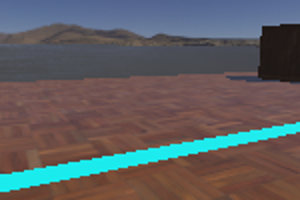

In [3]:
image = kinect.getColorImage()
display(image)

# Image processing

## Color filtering

## Blob detection